In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/따릉이/train.csv')
data.head(10)

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
5,20180106,0.618,0.522,0.696,0.228
6,20180107,0.598,0.478,0.606,0.238
7,20180108,0.742,0.528,0.848,0.202
8,20180109,0.652,0.488,0.838,0.206
9,20180110,0.500,0.406,0.636,0.160


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/따릉이/sample_submission.csv')
sub

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


In [ ]:
len(sub)

334

### 데이터 전처리

In [ ]:
data['일시'] = data['일시'].astype('str')

#data['MS'] = pd.to_datetime(data['일시']).dt.to_period('m')
data['일시'] = pd.to_datetime(data['일시']).dt.date
data = data.set_index('일시')
data.sort_index(inplace=True)
data

,광진구,동대문구,성동구,중랑구
일시,,,,
2018-01-01,0.592,0.368,0.580,0.162
2018-01-02,0.840,0.614,1.034,0.260
2018-01-03,0.828,0.576,0.952,0.288
2018-01-04,0.792,0.542,0.914,0.292
2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350
2021-12-28,4.510,3.890,3.714,2.700
2021-12-29,4.490,3.524,3.660,2.524


In [ ]:
data.isnull().sum()

광진구     0
동대문구    0
성동구     0
중랑구     0
dtype: int64

In [ ]:
print(data[data['광진구'] <= 0])
print(data[data['성동구'] <= 0])
print(data[data['동대문구'] <= 0])
print(data[data['중랑구'] <= 0])

            광진구  동대문구  성동구  중랑구
일시                             
2019-09-07  0.0   0.0  0.0  0.0
            광진구  동대문구  성동구  중랑구
일시                             
2019-09-07  0.0   0.0  0.0  0.0
            광진구  동대문구  성동구  중랑구
일시                             
2019-09-07  0.0   0.0  0.0  0.0
            광진구  동대문구  성동구  중랑구
일시                             
2019-09-07  0.0   0.0  0.0  0.0


In [ ]:
data.drop(data[data['광진구'] == 0].index, inplace=True)

In [ ]:
data.asfreq(freq='d', method='ffill')

,광진구,동대문구,성동구,중랑구
일시,,,,
2018-01-01,0.592,0.368,0.580,0.162
2018-01-02,0.840,0.614,1.034,0.260
2018-01-03,0.828,0.576,0.952,0.288
2018-01-04,0.792,0.542,0.914,0.292
2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350
2021-12-28,4.510,3.890,3.714,2.700
2021-12-29,4.490,3.524,3.660,2.524


In [ ]:
print(data[data['광진구'] <= 0])
print(data[data['성동구'] <= 0])
print(data[data['동대문구'] <= 0])
print(data[data['중랑구'] <= 0])

Empty DataFrame
Columns: [광진구, 동대문구, 성동구, 중랑구]
Index: []
Empty DataFrame
Columns: [광진구, 동대문구, 성동구, 중랑구]
Index: []
Empty DataFrame
Columns: [광진구, 동대문구, 성동구, 중랑구]
Index: []
Empty DataFrame
Columns: [광진구, 동대문구, 성동구, 중랑구]
Index: []


In [ ]:
data

,광진구,동대문구,성동구,중랑구
일시,,,,
2018-01-01,0.592,0.368,0.580,0.162
2018-01-02,0.840,0.614,1.034,0.260
2018-01-03,0.828,0.576,0.952,0.288
2018-01-04,0.792,0.542,0.914,0.292
2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350
2021-12-28,4.510,3.890,3.714,2.700
2021-12-29,4.490,3.524,3.660,2.524


### 딥러닝 전처리

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data['광진구'], test_size=0.25, shuffle=False)

In [ ]:
train

일시
2018-01-01    0.592
2018-01-02    0.840
2018-01-03    0.828
2018-01-04    0.792
2018-01-05    0.818
              ...  
2020-12-27    3.528
2020-12-28    4.542
2020-12-29    3.694
2020-12-30    2.366
2020-12-31    2.366
Name: 광진구, Length: 1095, dtype: float64

In [ ]:
print(train.shape)
print(test.shape)

(1095,)
(365,)


In [ ]:
def split_data(data, n_step_in, n_step_out):
  x,y = list(), list()
  
  for i in range(len(data)):
    start_idx = i + n_step_in
    end_idx = start_idx + n_step_out
    if end_idx > len(data):
      break

    data_x, data_y = data[i:start_idx], data[start_idx:end_idx]
    x.append(data_x)
    y.append(data_y)
  return np.asarray(x), np.asarray(y)

In [ ]:
n_step_in, n_step_out = 60,7
train_x, train_y = split_data(train.values, n_step_in, n_step_out)
test_x, test_y = split_data(test.values, n_step_in, n_step_out)

In [ ]:
print('train_x.shape : ',train_x.shape)
print('train_y.shape : ',train_y.shape)
print('test_x.shape : ',test_x.shape)
#print('test_y.shape : ',test_y.shape)

train_x.shape :  (1029, 60)
train_y.shape :  (1029, 7)
test_x.shape :  (299, 60)


In [ ]:
n_feature = 1
DL_train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],n_feature))
DL_train_y = train_y

DL_test_x = test_x.reshape((test_x.shape[0],test_x.shape[1],n_feature))

In [ ]:
print('DL_train_x.shape : ',DL_train_x.shape)
print('DL_train_y.shape : ',DL_train_y.shape)
print('DL_test_x.shape : ',DL_test_x.shape)
#print('DL_test_y.shape : ',DL_test_y.shape)

DL_train_x.shape :  (1029, 60, 1)
DL_train_y.shape :  (1029, 7)
DL_test_x.shape :  (299, 60, 1)


### 모델링

+ https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
+ https://dacon.io/codeshare/7684?dtype=recent

#### RNN

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout

from tensorflow.keras.utils import plot_model

In [ ]:
def model_RNN():
  model = Sequential()
  model.add(SimpleRNN(60, activation='relu',input_shape=(n_step_in,n_feature),return_sequences=True))
  model.add(Dropout(0.5))
  model.add(SimpleRNN(60, activation='relu',return_sequences=False))
  model.add(Dropout(0.5))
  model.add(Dense(60))
  model.add(Dense(n_step_out))

  model.compile(optimizer='adam',loss='mae')
  plot_model(model,show_shapes=True)
  plt.show()

  model.summary()

  try :
    history = model.fit(DL_train_x,DL_train_y,epochs=30)
  except : 
    pass

  pred_model = model.predict(DL_test_x)

  return pred_model, model

In [ ]:
pred_RNN, model_RNN = model_RNN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 60)            3720      
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60)                7260      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 7)                 427       
                                                                 
Total params: 15,067
Trainable params: 15,067
Non-traina

In [ ]:
print('pred_RNN.shape : ',pred_RNN.shape)

pred_RNN.shape :  (299, 7)


In [ ]:
print(test_y[-1, :])
print(pred_RNN[-1,:])

[1.946 1.62  3.83  4.51  4.49  4.444 3.616]
[5.076463  5.3019457 5.1479583 5.254504  5.041414  5.146989  5.2337546]


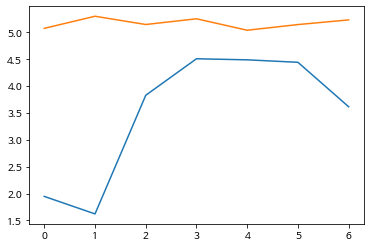

In [ ]:
plt.plot(test_y[-1, :])
plt.plot(pred_RNN[-1, :])
plt.show()

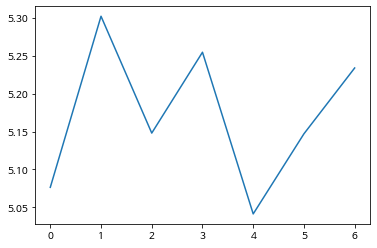

In [ ]:
plt.plot(pred_RNN[-1, :])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[:, -1], pred_RNN[: , -1])

2.0566326915268913

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[-1,:], pred_RNN[-1,:])

1.6781469541277205

#### LSTM

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM, Dropout

from tensorflow.keras.utils import plot_model

In [ ]:
def model_LSTM():
  model = Sequential()
  model.add(LSTM(60, activation='relu',input_shape=(n_step_in,n_feature),return_sequences=True))
  model.add(Dropout(0.5))
  model.add(LSTM(60, activation='relu',return_sequences=False))
  model.add(Dropout(0.5))
  model.add(Dense(60))
  model.add(Dense(n_step_out))

  model.compile(optimizer='adam',loss='mae')
  plot_model(model,show_shapes=True)
  plt.show()

  model.summary()

  try :
    history = model.fit(DL_train_x,DL_train_y,epochs=30)
  except : 
    pass

  pred_model = model.predict(DL_test_x)

  return pred_model

In [ ]:
pred_LSTM = model_LSTM()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout_2 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 7)                 427       
                                                                 
Total params: 48,007
Trainable params: 48,007
Non-trai

pred_LSTM.shape :  (299, 7)


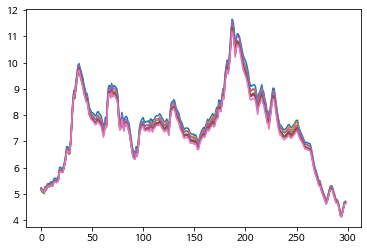

In [ ]:
print('pred_LSTM.shape : ',pred_LSTM.shape)
plt.plot(pred_LSTM)

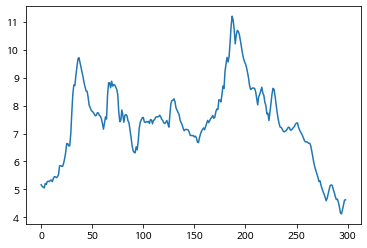

In [ ]:
plt.plot(pred_LSTM[: , -1])

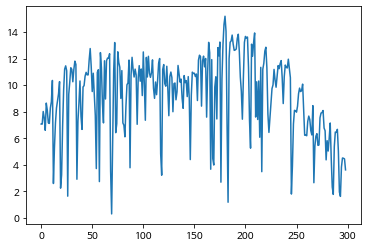

In [ ]:
plt.plot(test_y[:, -1])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[:, -1], pred_LSTM[: , -1])

2.775530159596217

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[-1,:], pred_LSTM[-1,:])

1.1698196743556433

#### GRU
+ https://wikidocs.net/22889

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import GRU, Dropout

In [ ]:
def model_GRU():
  model = Sequential()
  model.add(GRU(60, activation='relu',input_shape=(n_step_in,n_feature),return_sequences=True))
  model.add(Dropout(0.5))
  model.add(GRU(60, activation='relu',return_sequences=False))
  model.add(Dropout(0.5))
  model.add(Dense(60))
  model.add(Dense(n_step_out))

  model.compile(optimizer='adam',loss='mae')
  plot_model(model,show_shapes=True)
  plt.show()

  model.summary()

  try :
    history = model.fit(DL_train_x,DL_train_y,epochs=30)
  except : 
    pass

  pred_model = model.predict(DL_test_x)

  return pred_model

In [ ]:
pred_GRU = model_GRU()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 60)            11340     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 gru_1 (GRU)                 (None, 60)                21960     
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 60)                3660      
                                                                 
 dense_5 (Dense)             (None, 7)                 427       
                                                                 
Total params: 37,387
Trainable params: 37,387
Non-trai

pred_GRU.shape :  (299, 7)


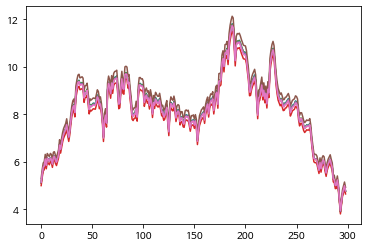

In [ ]:
print('pred_GRU.shape : ', pred_GRU.shape)
plt.plot(pred_GRU)

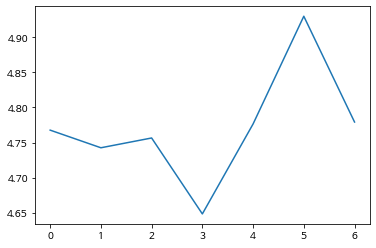

In [ ]:
plt.plot(pred_GRU[-1,:])

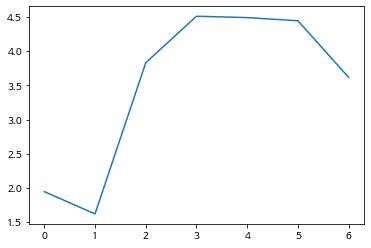

In [ ]:
plt.plot(test_y[-1,:])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[:, -1], pred_GRU[: , -1])

2.3401903107046684

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[-1,:], pred_GRU[-1,:])

1.277785688672747

#### CNN

In [ ]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
def model_CNN():
  model = Sequential()
  model.add(Conv1D(input_shape=(n_step_in,n_feature),filters=64, kernel_size=2,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(filters=64, kernel_size=2,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(60, activation='relu'))
  model.add(Dense(n_step_out))

  model.compile(optimizer='adam',loss='mae')
  plot_model(model,show_shapes=True)
  plt.show()

  model.summary()

  try :
    history = model.fit(DL_train_x,DL_train_y,epochs=30)
  except : 
    pass

  pred_model = model.predict(DL_test_x)

  return pred_model

In [ ]:
pred_CNN = model_CNN()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 59, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            8256      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense_6 (Dense)             (None, 60)               

pred_CNN.shape :  (299, 7)


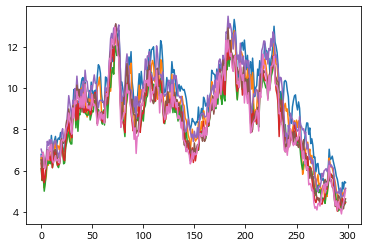

In [ ]:
print('pred_CNN.shape : ',pred_CNN.shape)
plt.plot(pred_CNN)

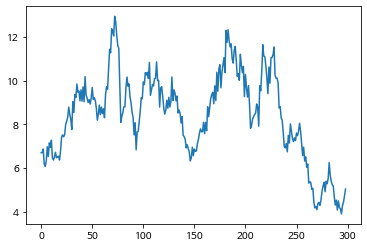

In [ ]:
plt.plot(pred_CNN[:,-1])

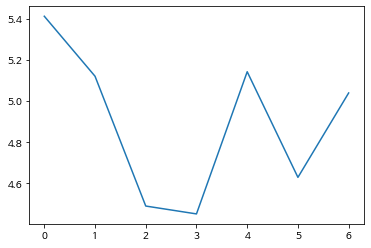

In [ ]:
plt.plot(pred_CNN[-1,:])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[:, -1], pred_CNN[: , -1])

2.2922199062806707

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[-1,:], pred_CNN[-1,:])

1.421329479762486

#### CNN-LSTM

In [ ]:
from keras.layers import RepeatVector #펼친 벡터를 LSTM에 각각의 입력으로 넣음, 플랫된 값이 n_step_out의 수만큼 만복해서 들어감
from keras.layers import TimeDistributed #LSTM의 리턴값으로 받은 스퀀스 각각에 대해 수행

In [ ]:
def model_CNN_LSTM():
  model=Sequential()
  model.add(Conv1D(input_shape=(n_step_in,n_feature),filters=64, kernel_size=2,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(RepeatVector(n_step_out))

  model.add(LSTM(120, activation='relu',return_sequences=True))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Dense(60,activation='relu')))
  model.add(TimeDistributed(Dense(n_step_out)))

  model.compile(optimizer='adam',loss='mae')
  plot_model(model,show_shapes=True)
  plt.show()

  model.summary()

  try :
    history = model.fit(DL_train_x,DL_train_y,epochs=30)
  except : 
    pass

  pred_model = model.predict(DL_test_x)

  return pred_model

In [ ]:
pred_CNN_LSTM = model_CNN_LSTM()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 59, 64)            192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1856)              0         
                                                                 
 repeat_vector (RepeatVector  (None, 7, 1856)          0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 7, 120)            948960    
                                                                 
 dropout_6 (Dropout)         (None, 7, 120)           

pred_CNN_LSTM.shape :  (299, 7, 7)


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


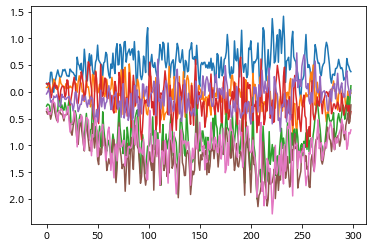

In [ ]:
print('pred_CNN_LSTM.shape : ',pred_CNN_LSTM.shape)
plt.plot(pred_CNN_LSTM[:, -1])

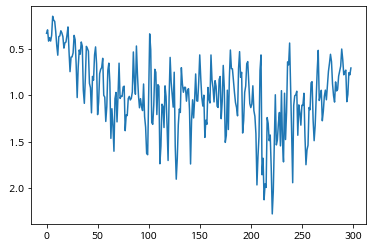

In [ ]:
plt.plot(pred_CNN_LSTM[:, -1][:,-1])

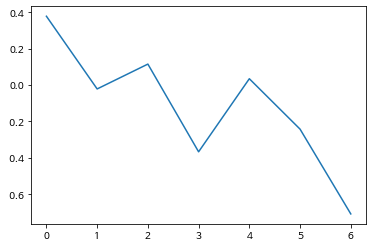

In [ ]:
plt.plot(pred_CNN_LSTM[-1,:][-1,:])

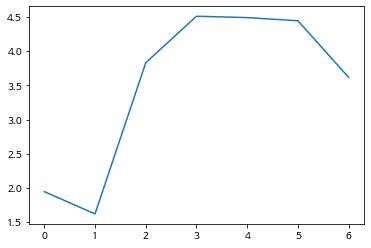

In [ ]:
plt.plot(test_y[-1,:])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[:, -1], pred_CNN_LSTM[: , -1][:,-1])

10.149305529137518

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y[-1,:], pred_CNN_LSTM[-1,:][-1,:])

3.6097212678279194

### 모델 피팅